### 1. Implementing Feedforward neural networks with Keras and TensorFlow for classification of hand-written MNIST dataset

#### a. Import necessary packages

C:\Users\Gayatri Tagalpallewa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.6039 - loss: 1.5576 - val_accuracy: 0.8767 - val_loss: 0.5154
Epoch 2/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.8767 - loss: 0.4888 - val_accuracy: 0.8993 - val_loss: 0.3687
Epoch 3/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8985 - loss: 0.3727 - val_accuracy: 0.9105 - val_loss: 0.3181
Epoch 4/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9104 - loss: 0.3212 - val_accuracy: 0.9201 - val_loss: 0.2883
Epoch 5/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9166 - loss: 0.2952 - val_accuracy: 0.9226 - val_loss: 0.2699
Epoch 6/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9222 - loss: 0.2780 - val_accuracy: 0.9285 - val_loss: 0.2538
Epoch 7/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9261 - loss: 0.2615 - val_accuracy: 0.9317 - val_loss: 0.2409
Epoch 8/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9294 - loss: 0.2462 - va

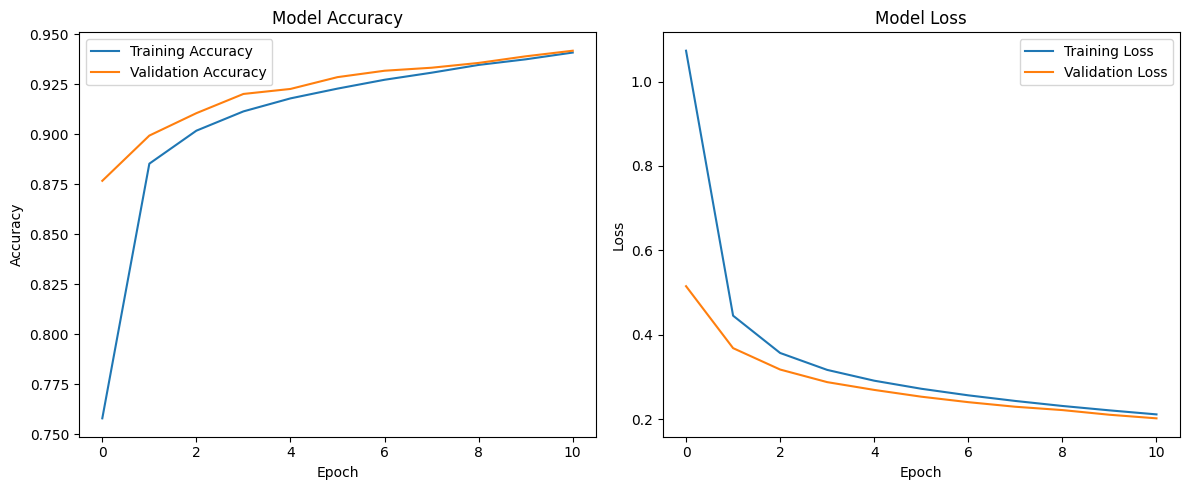

In [2]:
# Import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

# Load data
train_df = pd.read_csv('mnist_train.csv')
test_df = pd.read_csv('mnist_test.csv')

# Separate features and labels
x_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

x_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

# Normalize values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model Summary
model.summary()

history = model.fit(
    x_train, 
    y_train,
    validation_data=(x_test,y_test),
    epochs=11,
    batch_size=128,
    verbose=1
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc*100:.2f}%")
print(f"Test loss: {test_loss:.4f}%")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')   
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')   
plt.legend()

plt.tight_layout()
plt.show()

In [1]:
# Import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

#### b. Load training and testing data

In [2]:
# Load data
train_df = pd.read_csv('mnist_train.csv')
test_df = pd.read_csv('mnist_test.csv')

In [3]:
# Separate features and labels
x_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

x_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

In [4]:
# Normalize values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#### c. Define network architecture

In [5]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\gaura\Desktop\sem7\lp4 final ps\venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

#### Train the model

In [7]:
history = model.fit(
    x_train, 
    y_train,
    validation_data=(x_test,y_test),
    epochs=11,
    batch_size=128,
    verbose=1
)

Epoch 1/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7423 - loss: 1.1120 - val_accuracy: 0.8763 - val_loss: 0.5215
Epoch 2/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8847 - loss: 0.4441 - val_accuracy: 0.9003 - val_loss: 0.3645
Epoch 3/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9034 - loss: 0.3519 - val_accuracy: 0.9124 - val_loss: 0.3152
Epoch 4/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9121 - loss: 0.3114 - val_accuracy: 0.9194 - val_loss: 0.2848
Epoch 5/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9193 - loss: 0.2856 - val_accuracy: 0.9265 - val_loss: 0.2651
Epoch 6/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9249 - loss: 0.2658 - val_accuracy: 0.9313 - val_loss: 0.2496
Epoch 7/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9291 - loss: 0.2499 - val_accuracy: 0.9347 - val_loss: 0.2361
Epoch 8/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9332 - loss: 0.2361 - val_accur

#### e. Evaluate the network

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc*100:.2f}%")
print(f"Test loss: {test_loss:.4f}%")


Test accuracy: 94.37%
Test loss: 0.1983%


#### f. Plot training loss and accuracy

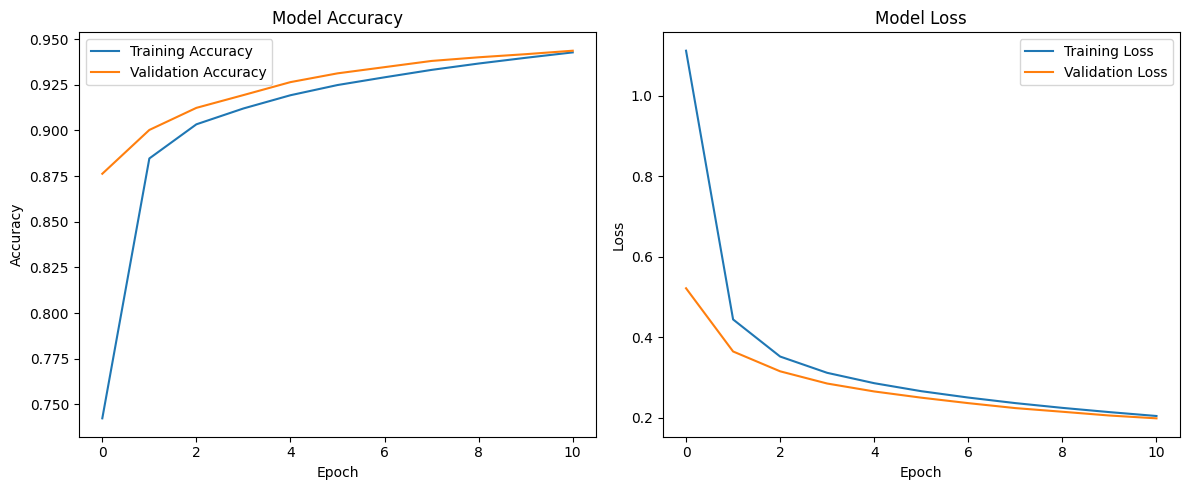

In [9]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')   
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')   
plt.legend()

plt.tight_layout()
plt.show()